In [17]:
# import necessary libraries 

import pandas      as pd
import numpy       as np

import scipy       as sp
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
# read CSV file of survey responses 

datafile = './lockdown.csv'

df = pd.read_csv(datafile, header=0, index_col=None)

In [3]:
# Data collection survey method did not allow for na answers so no null values 
# quicklook at data 
# engineer to reform accuracy before analysis 
df.head()

,1. Please select your age range:,"2. Please state the country you typically live and work in. If you live in the United Kingdom, please give the specific nation, e.g. England",3. Please provide your occupational status. Tick all that apply.,4. Have you been subject to furlough or lost work at any time throughout the pandemic?,"5. In your opinion, how heavily has the situation impacted your industry?","6. Which industry do you mainly work in? E.g. IT, leisure, engineering, services.",7. Have you been able to work flexibly or from home during lockdown periods?,"8. Do you feel your employer has provided adequate methods for you to work safely and effectively, such as PPE provision or remote work allowances if possible?","9. During lockdown periods, which of the following would best describe your feelings? Tick the 3 that apply most strongly.","10. Assuming the choice and ability, would you be like to work remotely?",11. Do you believe working environments will eventually return to the pre-Covid situation?,12. How strongly do you agree that your government has been clear and fair in the creation and application of lockdown working rules?
0,30 - 35,England,Employed full-time,NaN,Unsure,Banking,"Flexibly,Working from home",Yes,"Rested,Productive,Positive","Yes, part of the time",Yes,Disagree
1,30 - 35,England,Employed full-time,Yes,Unsure,Finance,Flexibly,Yes,"Peaceful,Rested,Productive","Yes, all of the time",No,Disagree
2,30 - 35,England,Full-time student,No,Somewhat positively,IT,Both,Not Applicable,"Anxious,Productive,Depressed","Yes, all of the time",Unsure,Agree
3,22 - 25,Scotland,"Employed part-time,Full-time student",No,Somewhat negatively,Banking,Working from home,Yes,"Anxious,Productive,Confused","Yes, part of the time",No,Agree
4,30 - 35,England,Employed full-time,No,Somewhat negatively,IT,Working from home,Yes,"Anxious,Productive,Depressed","Yes, part of the time",No,Very strongly disagree


In [5]:
# column headings made up of surbey questions. This is a cumbersome arrangement, so changed to single word headings 
df.columns = ['Age', 'Country', 'Employment', 'Furlough', 'Impact', 'Industry', 'Flexibility', 'PPE', 'Emotions', 'WFH', 'Future', 'Government']

In [37]:
# repetition in flexibility choices corrected 
df1=df.replace({'Flexibility' : { 'Flexibly,Both' : 'Both', 'Flexibly,Working from home' : 'Both'  }})

In [38]:
# shorten flexibility responses 
df2=df1.replace({'Flexibility' : { 'Neither - employer has not allowed it' : 'Not Permitted', 'Neither - not physically possible' : 'Physically Impossible' }})

In [39]:
# synonmynous industries collected 
df3=df2.replace({'Industry' : { 'Banking' : 'Finance', 'MoD' : 'Defence', 'Medical' : 'Healthcare', 'Infrastructure' : 'Construction', 'Energy' : 'Engineering', 'travel' : 'Travel' }})

In [40]:
# collect countries
df4=df3.replace({'Country' : { 'Usa' : 'USA', 'UnitedStates' : 'USA', 'US' : 'USA', 'switzerland' : 'Switzerland' }})

In [104]:
# set global plot settings 
plt.rc('legend',**{'fontsize':18}, **{'title_fontsize':18})

In [154]:
# acquire summary percentage stats for relevant columns
100 * df4['Country'].value_counts(normalize=True)

England        66.666667
USA            10.000000
Scotland        6.666667
Wales           3.333333
SouthAfrica     3.333333
Switzerland     3.333333
Canada          3.333333
Luxembourg      3.333333
Name: Country, dtype: float64

In [41]:
# usually summary stats not helpful as no fully numerical columns 
# investigate the backgrounds of respondents, i.e. country, age, employment status, and industry 
df4['Country'].value_counts()

England        20
USA             3
Scotland        2
Wales           1
SouthAfrica     1
Switzerland     1
Canada          1
Luxembourg      1
Name: Country, dtype: int64

In [21]:
df_country=df4['Country'].value_counts()

C:\Users\mcdou\anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


Text(0, 0.5, '')

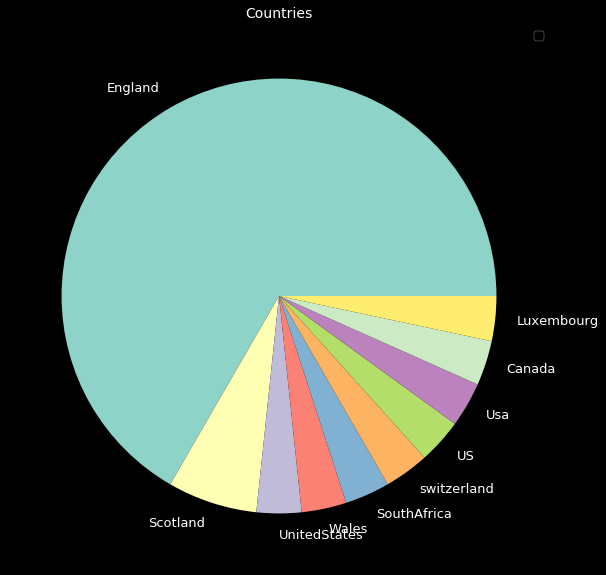

In [24]:
df_country.plot.pie(y="Country", figsize=(10, 10))
plt.title('Countries', fontsize=14)
plt.legend('')
plt.style.use('seaborn-talk')
plt.axes().set_ylabel('')

In [23]:
df_age=df4['Age'].value_counts()

C:\Users\mcdou\anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


Text(0, 0.5, '')

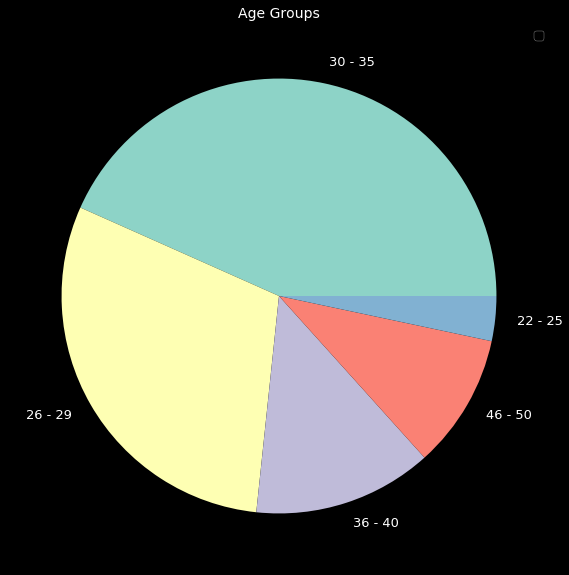

In [26]:
df_age.plot.pie(y="Age", figsize=(10, 10))
plt.title('Age Groups', fontsize=14)
plt.legend('')
plt.style.use('seaborn-talk')
plt.axes().set_ylabel('')

In [27]:
df_employment=df4['Employment'].value_counts()

Text(0.5, 1.0, 'Employment Types')

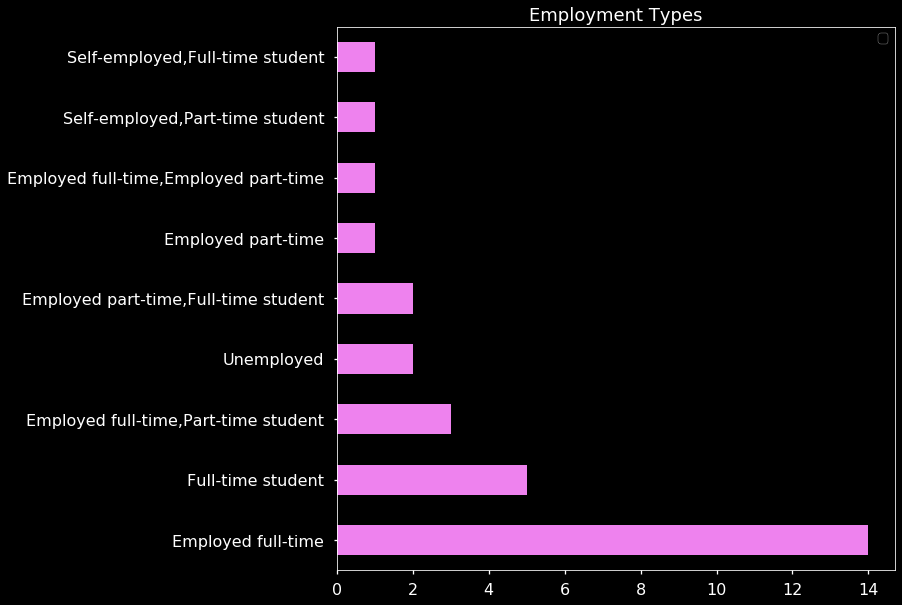

In [28]:
# horizontal bar offers clearer quickview due to long category titles 
# also gives clear view of numbers 
df_employment.plot.barh(y='Employment', figsize=(10,10), color='violet', fontsize=16)
plt.legend('')
plt.title('Employment Types', fontsize=18)

In [30]:
df_industry=df4['Industry'].value_counts()

Text(0.5, 1.0, 'Individuals per Industry')

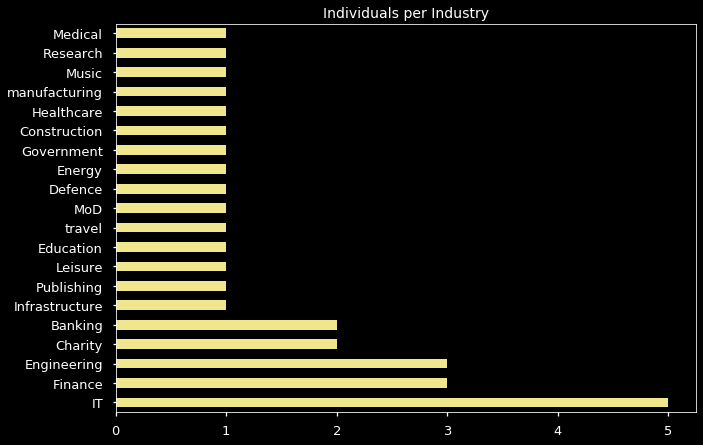

In [31]:
df_industry.plot(kind='barh', color='khaki')
plt.locator_params(axis="x", integer=True, tight=True)
#plt.ylabel('Industry', fontsize=12)
#plt.xlabel('Responses', fontsize=12)
plt.title('Individuals per Industry', fontsize=14)

In [ ]:
# furlough and PPE graphs for reference 
# majority response satisfied with PPE 
# majority response not subject to furlough 

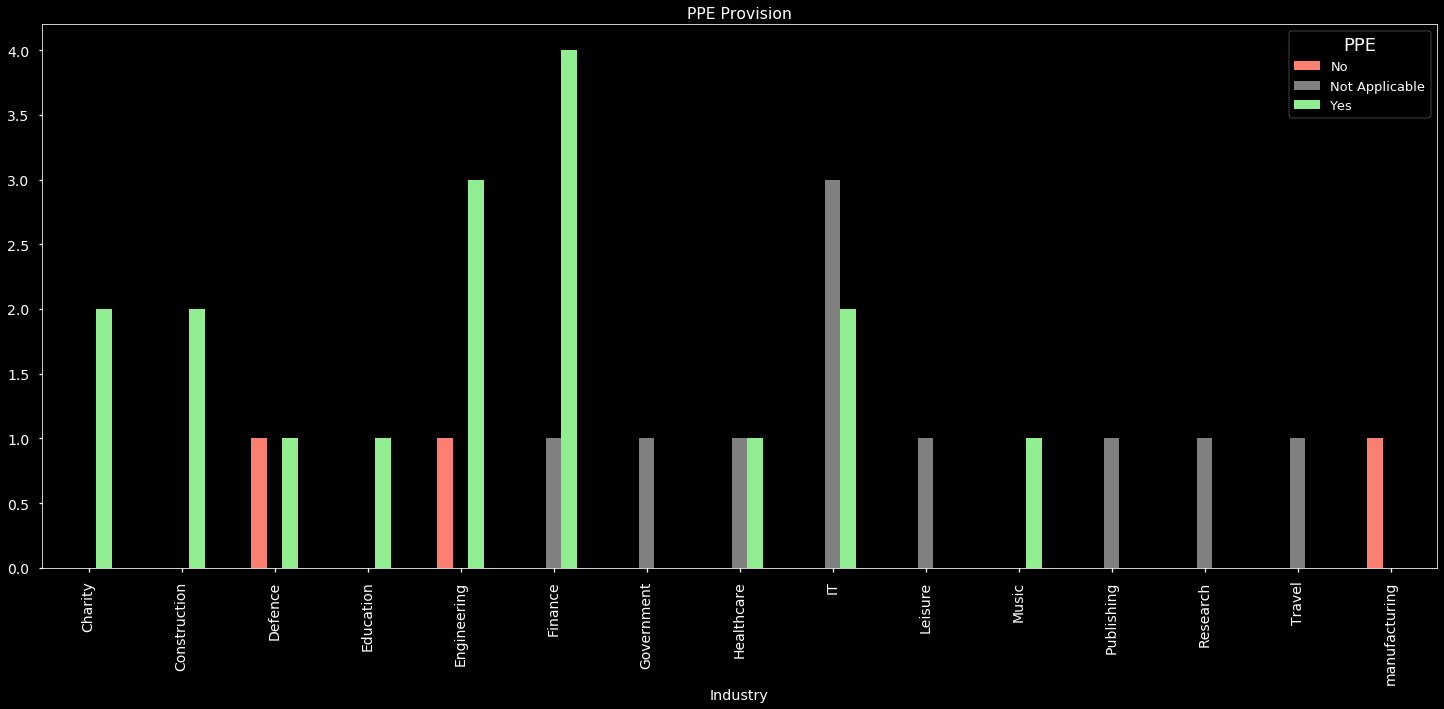

In [42]:
df4.groupby('Industry').PPE.value_counts().unstack().plot(kind='bar', color=['salmon', 'grey', 'lightgreen'], figsize=(25,10), fontsize=14, title=("PPE Provision"))

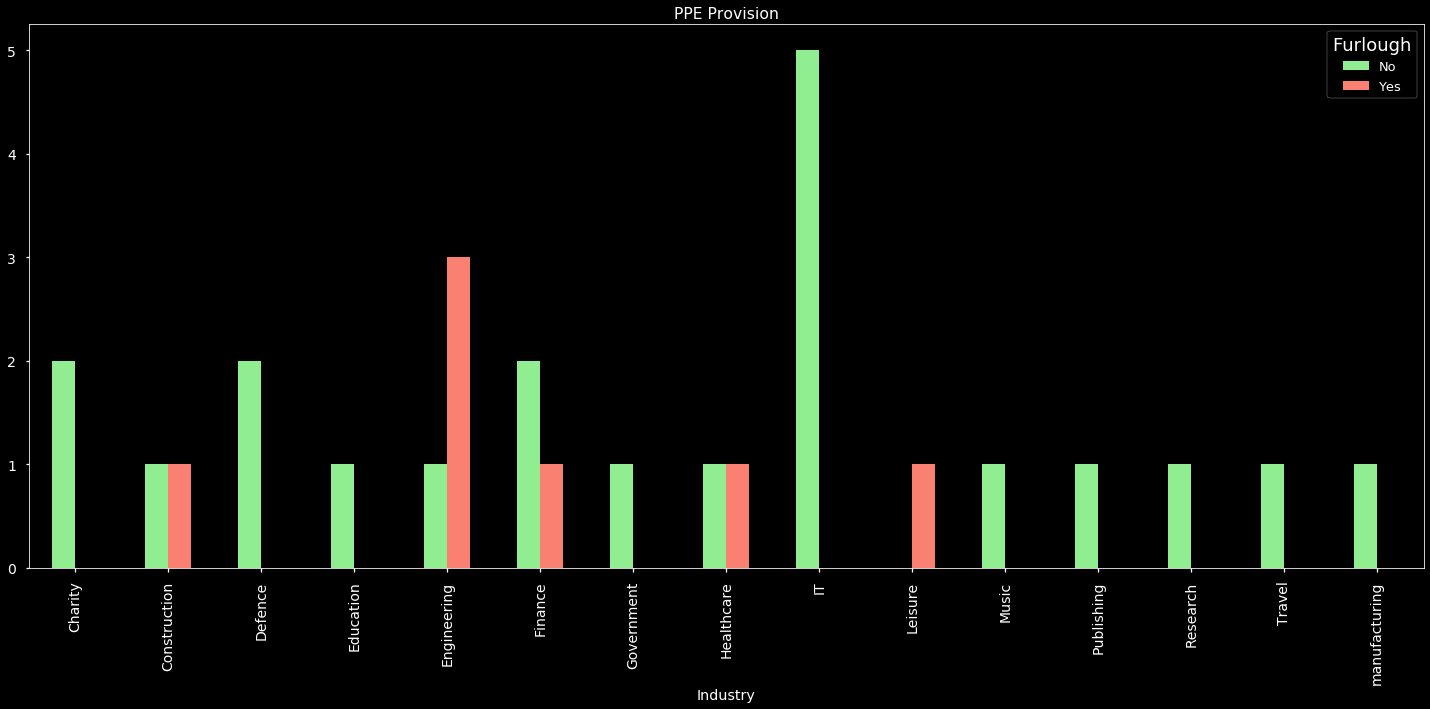

In [44]:
df4.groupby('Industry').Furlough.value_counts().unstack().plot(kind='bar', color=['lightgreen', 'salmon'], figsize=(25,10), fontsize=14, title=("PPE Provision"))

In [122]:
df_impact = df4['Impact'].value_counts()

C:\Users\mcdou\anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'How Has Your Industry Been Impacted?')

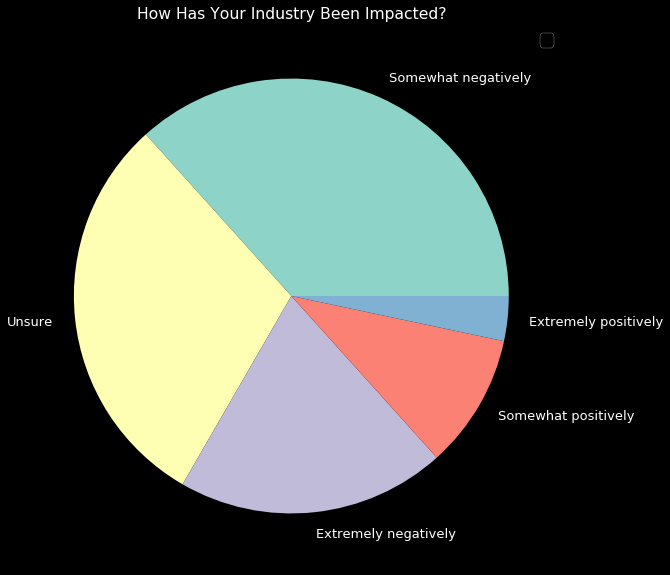

In [130]:
df_impact.plot.pie(y='Impact', figsize=(10,10))
plt.legend('')
plt.axes().set_ylabel('')
plt.title('How Has Your Industry Been Impacted?')

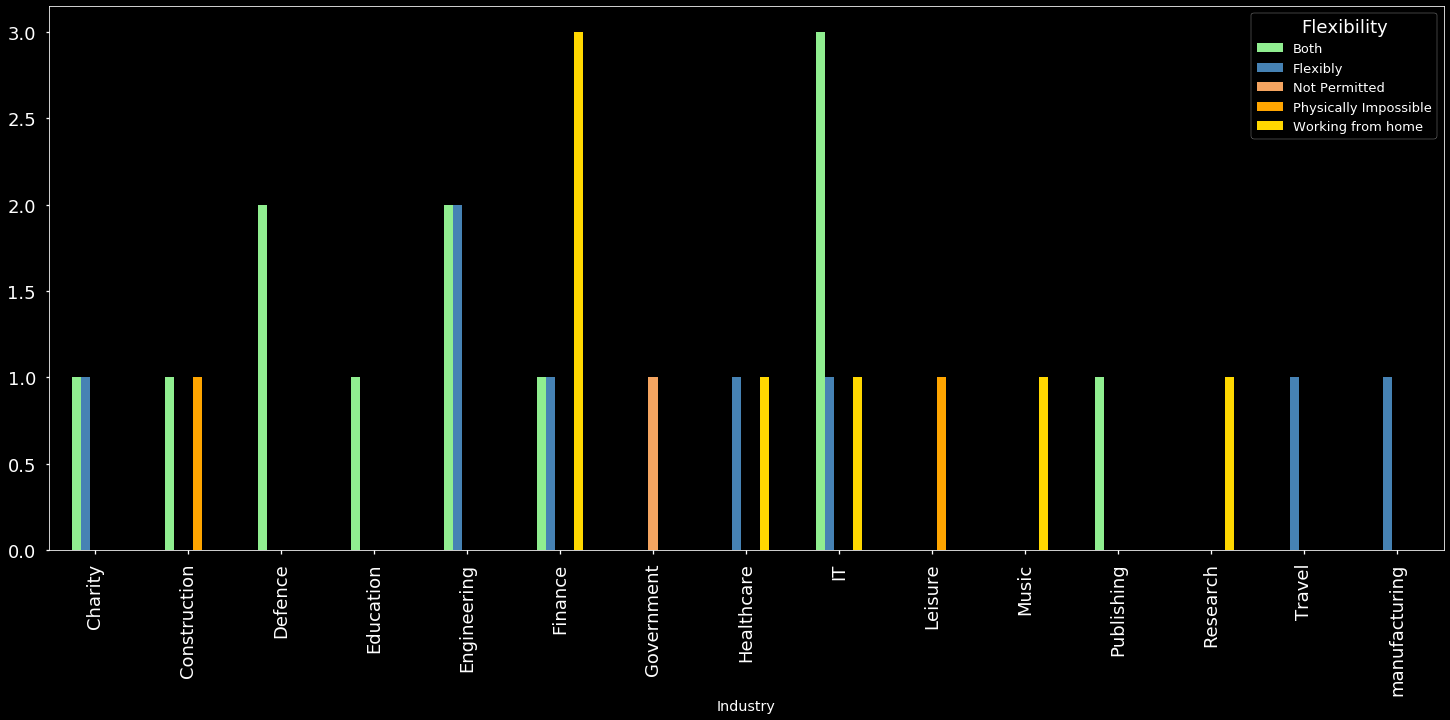

In [45]:
# Compare flexible working in industries using groupby 
# colour coded green - red / pos - neg responses 
df4.groupby('Industry').Flexibility.value_counts().unstack().plot(kind='bar', color=['lightgreen', 'steelblue', 'sandybrown', 'orange', 'gold'], figsize=(25,10), fontsize=18)


In [ ]:
# Next step to look at the emotion-based responses and make sense of them within the context of the rest of the survey
# pull out the overall word count of the three selected words 


In [46]:
ems = df4['Emotions'].tolist()

In [47]:
# collect and split words 
ems2 = []
for word in ems:
    word = word.split(",")
    ems2.extend(word)  

In [48]:
ems3=pd.DataFrame(ems2)

In [49]:
ems4=ems3[0].value_counts()

Text(0.5, 1.0, 'Overall Emotion Wordcount')

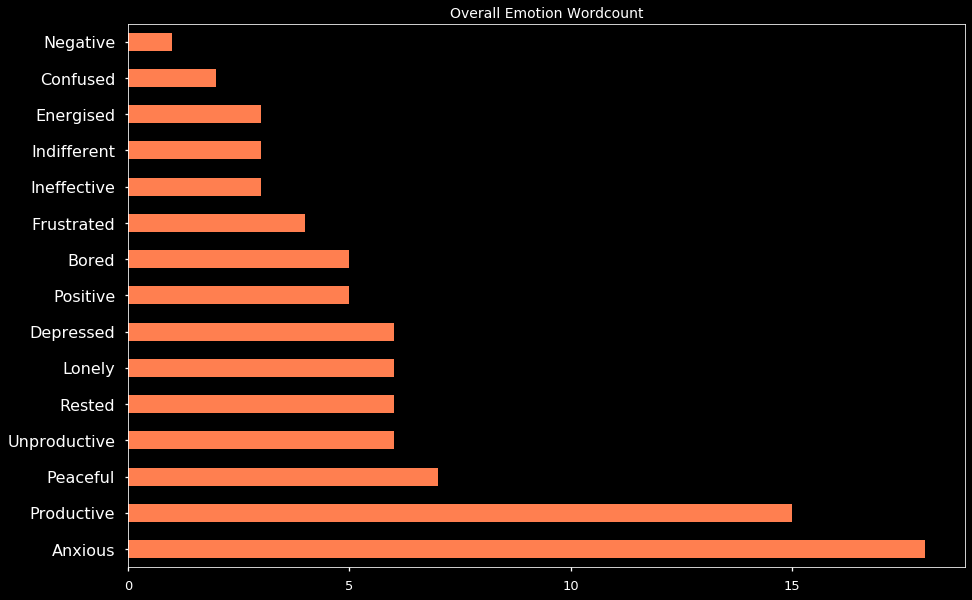

In [51]:
ems4.plot(kind='barh', color='coral', figsize=(15,10))
plt.locator_params(axis="x", integer=True, tight=True)
plt.yticks(fontsize=16)
plt.title('Overall Emotion Wordcount', fontsize=16)


In [ ]:
# "Anxious" is by far the most frequent response 

# If answers including "Anxious" are removed, how does the pattern of responses change?

In [52]:
# Loop through column and select replies that do not include "Anxious"
noanx=[]    
for i in ems:    
    if "Anxious" not in i in ems:
        noanx.append(i)

In [54]:
# Once instances collected, split words list into single words 
noanx2 = []
for word in noanx:
    word = word.split(",")
    noanx2.extend(word)

In [55]:
sec_em = pd.DataFrame(noanx2)
sec2_em = sec_em[0].value_counts()

Text(0.5, 1.0, 'Answers not including "Anxious"')

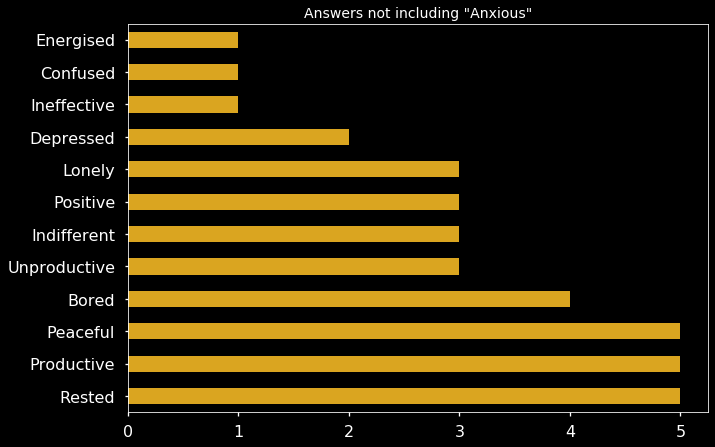

In [56]:
sec2_em.plot(kind='barh', color = 'goldenrod', fontsize=16)
plt.title('Answers not including "Anxious"', fontsize=14)
# answers not including anxious - Rested, Productive, and Peaceful notably present frequently 

In [ ]:
# For answers that did include "Anxious", what were the other responses like?

In [59]:
secondary=[]
for i in ems: 
    if "Anxious" in i in ems:
        secondary.append(i)


In [60]:
secondarysplit = []
for word in secondary:
    word = word.split(",")
    secondarysplit.extend(word)

In [63]:
# for responses where anxious was also a response 
df_secondary = pd.DataFrame(secondarysplit)
secondarysplitvals = df_secondary[0].value_counts()
#ems22 = ems22.sort_index()

In [64]:
secondarysplitvals=secondarysplitvals.drop(secondarysplitvals.index[0])
# drop the "Anxious" element as looking for other words

Text(0.5, 1.0, 'Answers including "Anxious"')

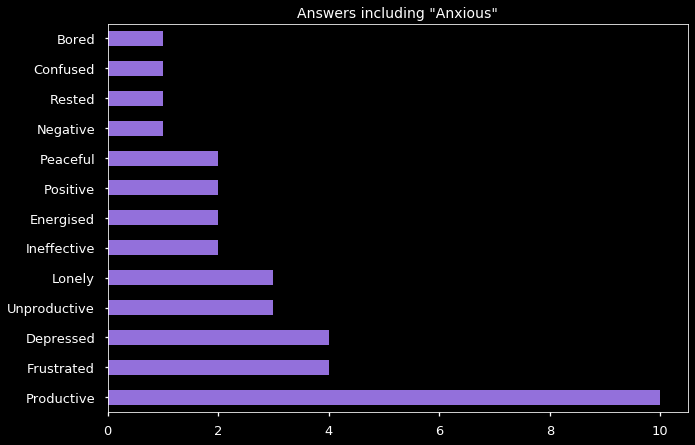

In [65]:
secondarysplitvals.plot(kind='barh', color='mediumpurple')
plt.title('Answers including "Anxious"', fontsize=14)

# For those who selected "Anxious", other frequent feelings are productivity and frustration 

In [ ]:
# Is there a distribution on anxiety with age?

In [66]:
# responses simply y or n depending on anxiety response 
agestress=[]
for i in ems:
    if "Anxious" in i in ems: 
        agestress.append('Anx')
    else:
        agestress.append('NoAnx')

In [69]:
# add column to df 
df4['Anxiety']=agestress

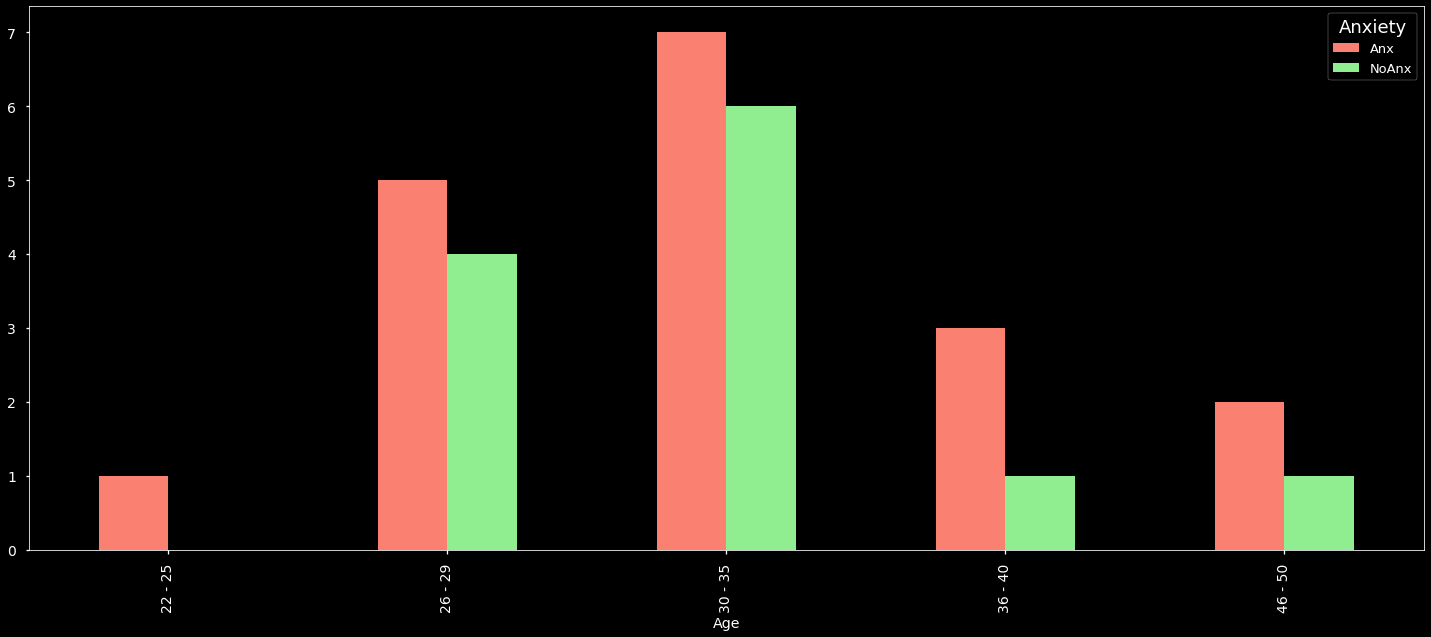

In [71]:
df4.groupby('Age').Anxiety.value_counts().unstack().plot(kind='bar', color=['salmon', 'lightgreen'], figsize=(25,10), fontsize=14,)
# even distribution across age groups

In [ ]:
# applying a positive or negative value to a word in order to develop a numerical emotion score  

In [72]:
#  function to loop through emotion reponses list and assign a score 
def happy1(x): 
    
    score = []      # empty list of scores 
    i = iter(x[0])
    next(i)
    
    for i in x:
        
        temp = 0  # initial score for each individual response 
        
        if "Rested" in i:
            temp=temp+2   # postive emotions = positive value
        if "Anxious" in i:
            temp=temp-2 # negative emotions = negative value 
        if "Productive" in i:
            temp=temp+3
        if "Positive" in i:
            temp=temp+3
        if "Peaceful" in i:
            temp=temp+2    
        if "Depressed" in i:
            temp=temp-3
        if "Confused" in i: 
            temp=temp-2
        if "Energised" in i:
            temp=temp+2
        if "Frustrated" in i:
            temp=temp-2
        if "Ineffective" in i:
            temp=temp-1
        if "Negative" in i:
            temp=temp-3
        if "Lonely" in i:
            temp=temp-2
        if "Indifferent" in i:
            temp=temp+0 # included for completion 
        if "Bored" in i: 
            temp=temp-1
        if "Unproductive" in i:
            temp=temp-2

        score.append(temp)
    return score    
    print(score)        

In [73]:
happything = happy1(ems) # fetch list from 'ems' used previously

In [77]:
em_scores = pd.DataFrame(happything) # make dataframe to plot from 
em_scores['Y']=1  # assign constant for y-axis 
em_scores.columns=["Score", "Y"]

In [78]:
# function to assign different colours for positive and negative scores for plots 

def pltcolor(lst):
    cols=[]  # empty list 
    for l in lst:
        if l >0:  # pos vals
            cols.append('gold')
        elif l <0:  # neg vals
            cols.append('cyan')
        else: # for value=0
            cols.append('slategrey')
    return cols

In [79]:
cols=pltcolor(em_scores["Score"]) # fetch colours from emotion scores

In [82]:
# define bubble size by score value count 
# map value counts 
em_scores['bub']= em_scores.Score.map(em_scores.Score.value_counts())

In [83]:
# enhance bubble size 
em_scores['bub'] = 1500 * em_scores['bub']

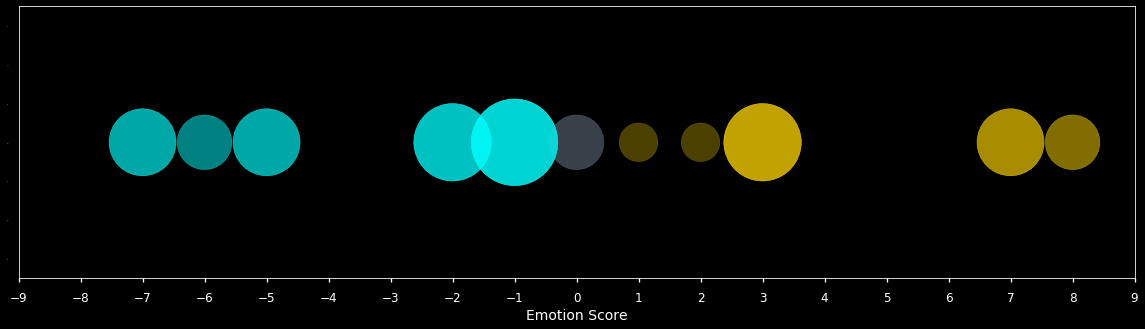

In [85]:
q = em_scores['Score']
w = em_scores['Y']
plt.figure(figsize=(20,5))
plt.scatter(q, w, c=cols, s=em_scores["bub"], alpha=0.3)
plt.tick_params(axis='y', labelsize=0, length = 0)
plt.xlabel('Emotion Score', fontsize=14)
plt.locator_params(axis="x", integer=True, tight=True)
plt.xticks(np.arange(-9, 10, 1), fontsize=12)
ax = plt.gca()

In [ ]:
# investigate emotion score by groups 

In [88]:
df4['EmScore'] = happything

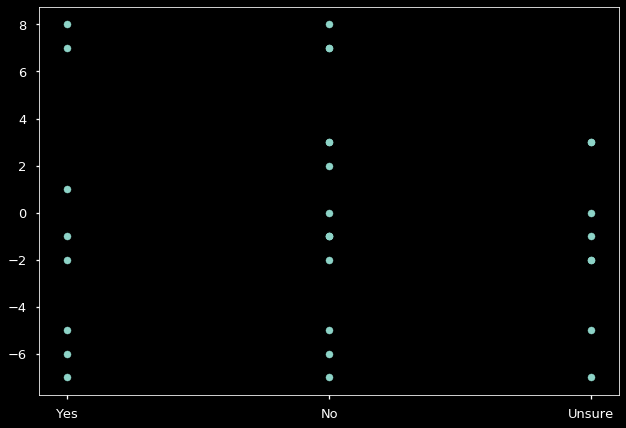

In [93]:
plt.scatter(df4['Future'], df4['EmScore'], s=50)

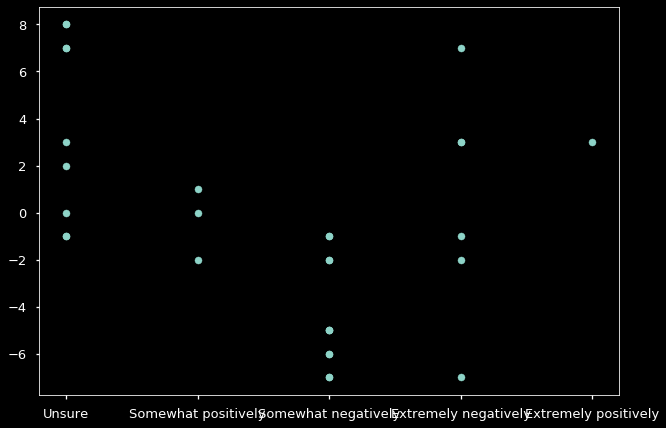

In [94]:
plt.scatter(df4['Impact'], df4['EmScore'], s=50)

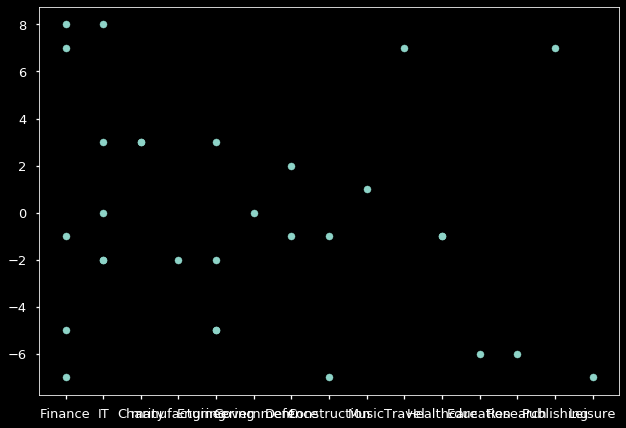

In [95]:
plt.scatter(df4['Industry'], df4['EmScore'], s=50)

In [96]:
# string to numerical for plot
agetest=df4.replace({'Age' : { '22 - 25' : 25, '26 - 29' : 29, '30 - 35' : 35, '36 - 40' : 40, '46 - 50' :50  }})

In [97]:
agecols=pltcolor(agetest["EmScore"]) # call colour function 

Text(0.5, 1.0, 'Emotion Score for Age Groups')

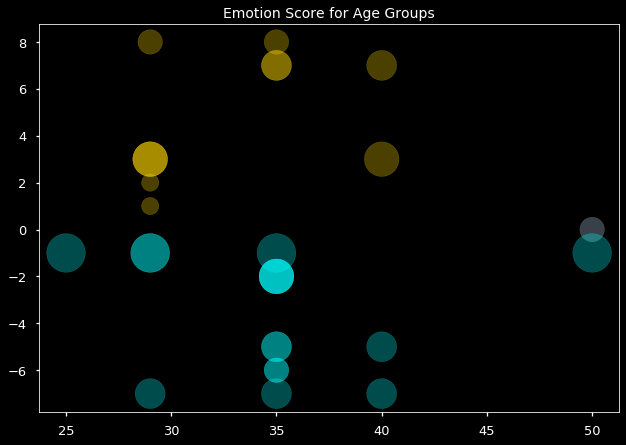

In [160]:
plt.scatter(agetest['Age'], agetest['EmScore'], s=(em_scores["bub"]*0.2), color=agecols, alpha=0.3)
plt.title('Emotion Score for Age Groups', fontsize=14)

In [100]:
# group attitudes to different working patterns 

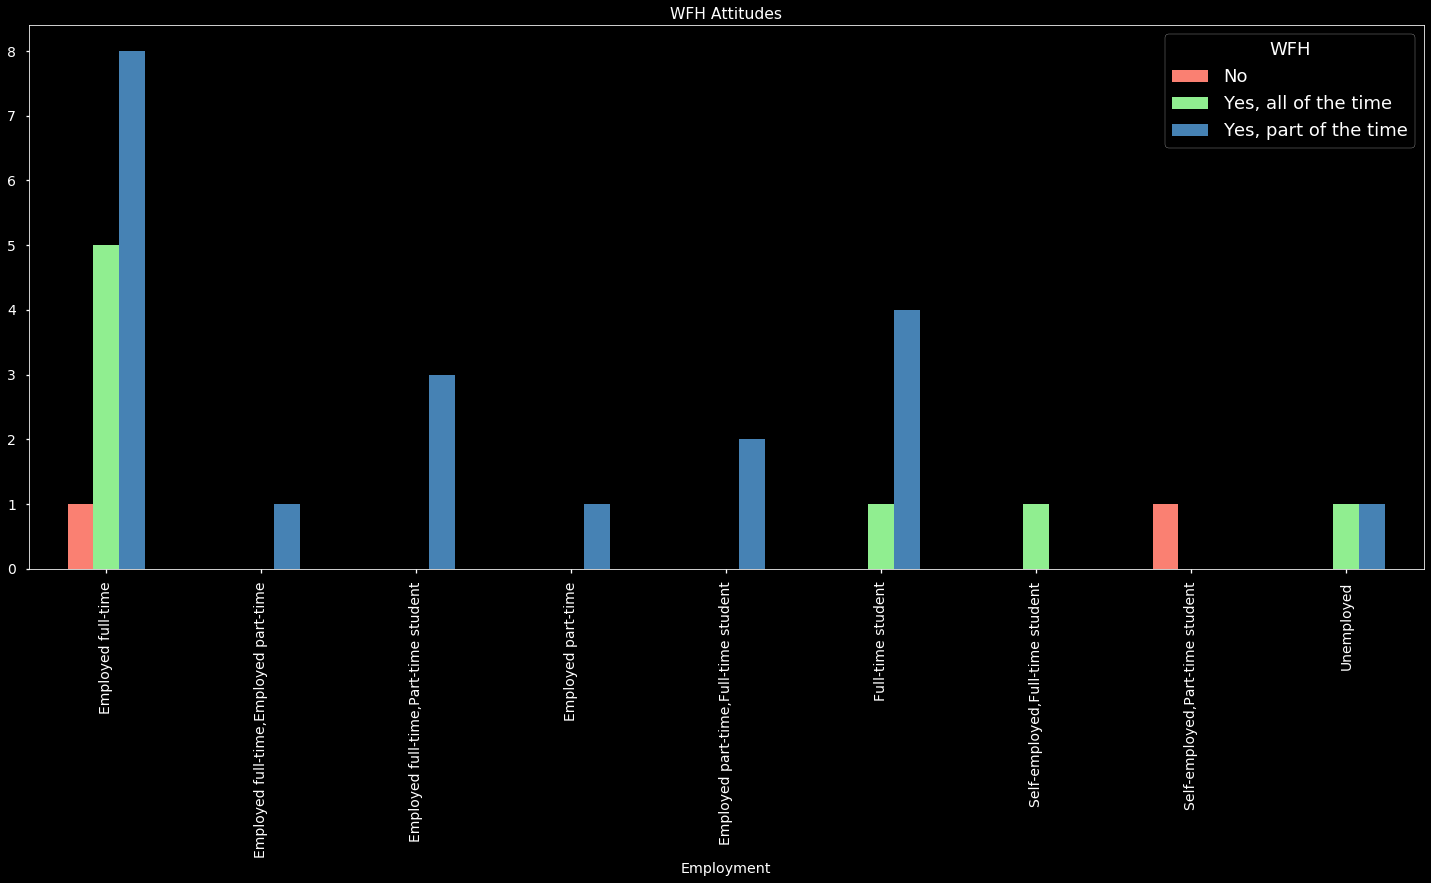

In [105]:
df4.groupby('Employment').WFH.value_counts().unstack().plot(kind='bar', color=['salmon', 'lightgreen', 'steelblue'], figsize=(25,10), fontsize=14, title=("WFH Attitudes"))


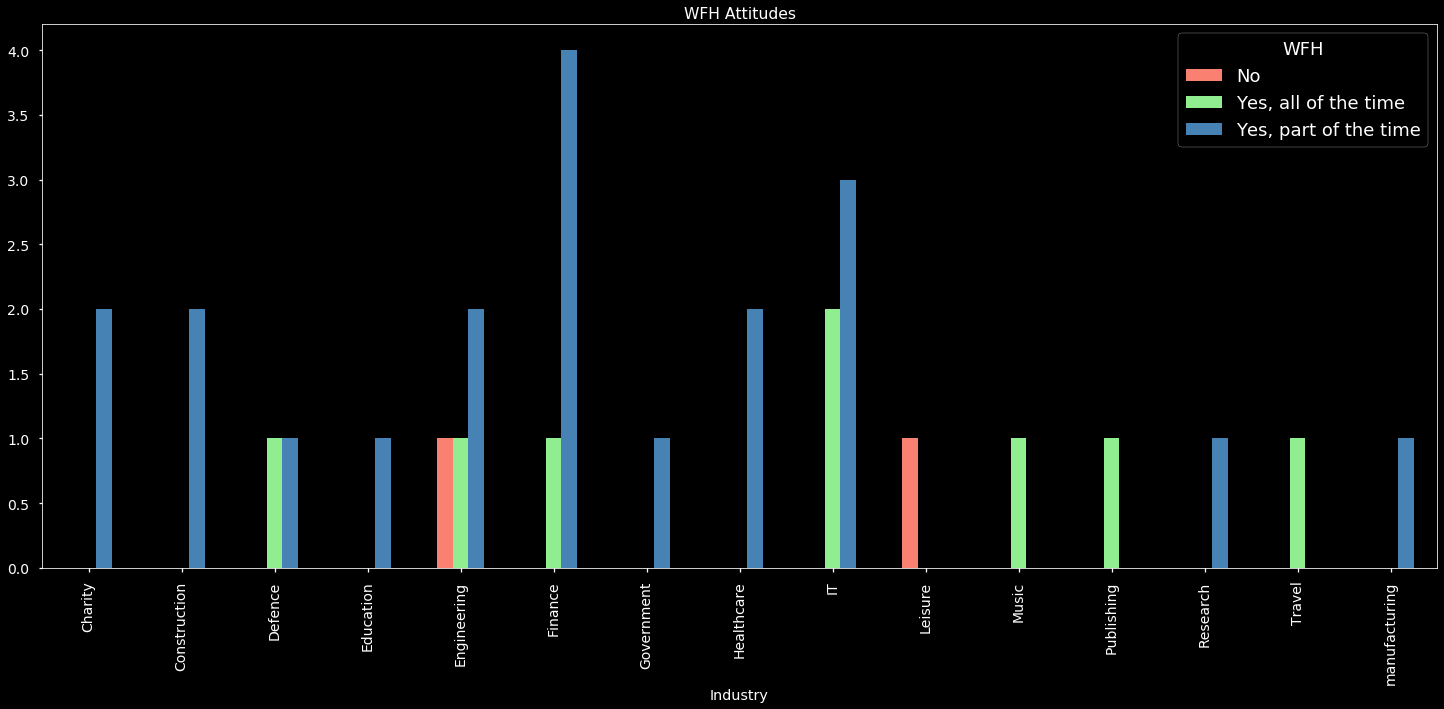

In [106]:
df4.groupby('Industry').WFH.value_counts().unstack().plot(kind='bar', color=['salmon', 'lightgreen', 'steelblue'], figsize=(25,10), fontsize=14, title=("WFH Attitudes"))


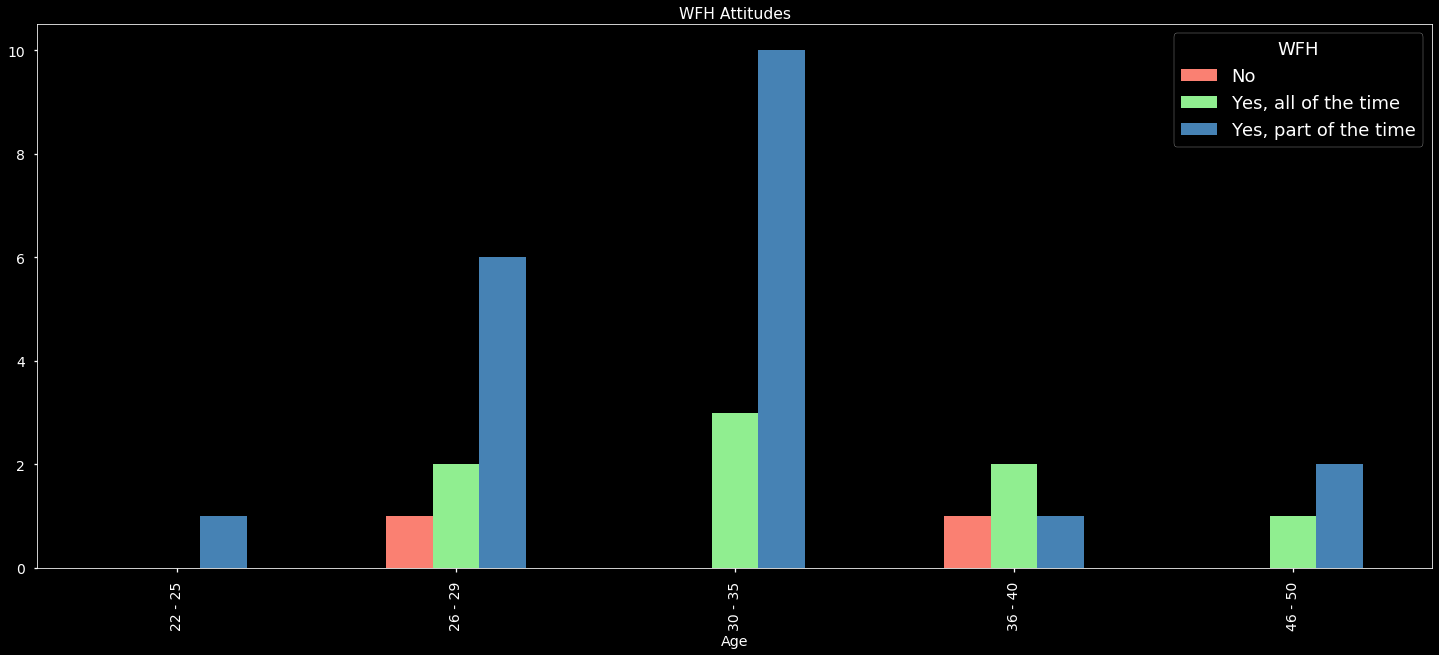

In [107]:
df4.groupby('Age').WFH.value_counts().unstack().plot(kind='bar', color=['salmon', 'lightgreen', 'steelblue'], figsize=(25,10), fontsize=14, title=("WFH Attitudes"))


In [112]:
df4['Government'].value_counts()


Disagree                  11
Agree                      8
No opinion                 6
Very strongly disagree     5
Name: Government, dtype: int64

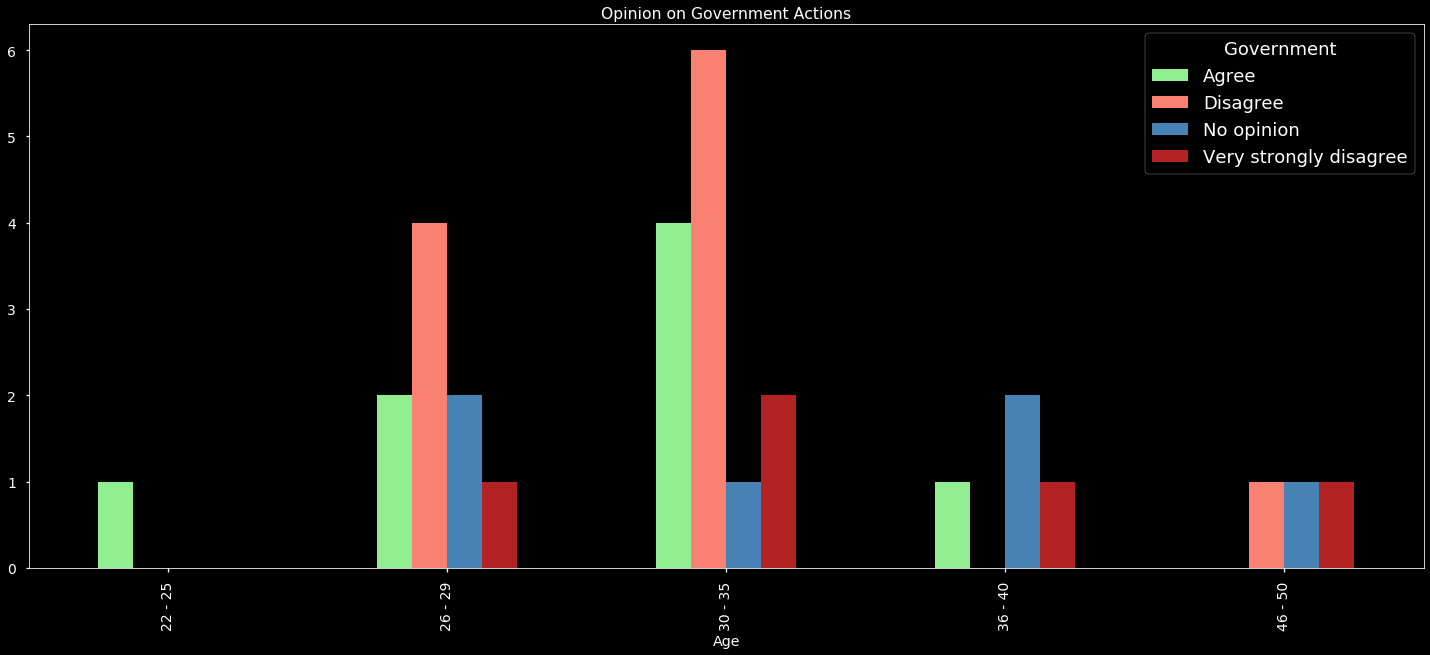

In [118]:
df4.groupby('Age').Government.value_counts().unstack().plot(kind='bar', color=['lightgreen', 'salmon', 'steelblue', 'firebrick'], figsize=(25,10), fontsize=14, title=("Opinion on Government Actions"))


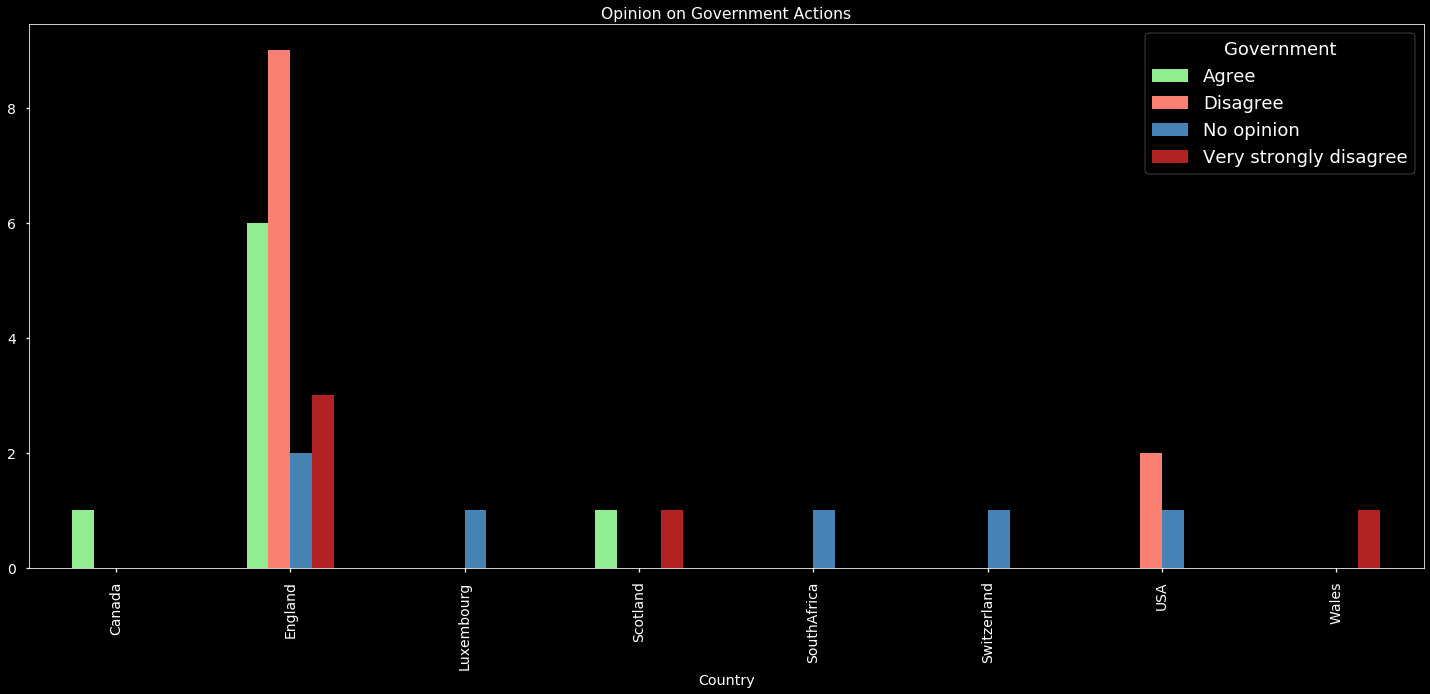

In [117]:
df4.groupby('Country').Government.value_counts().unstack().plot(kind='bar', color=['lightgreen', 'salmon', 'steelblue', 'firebrick'], figsize=(25,10), fontsize=14, title=("Opinion on Government Actions"))


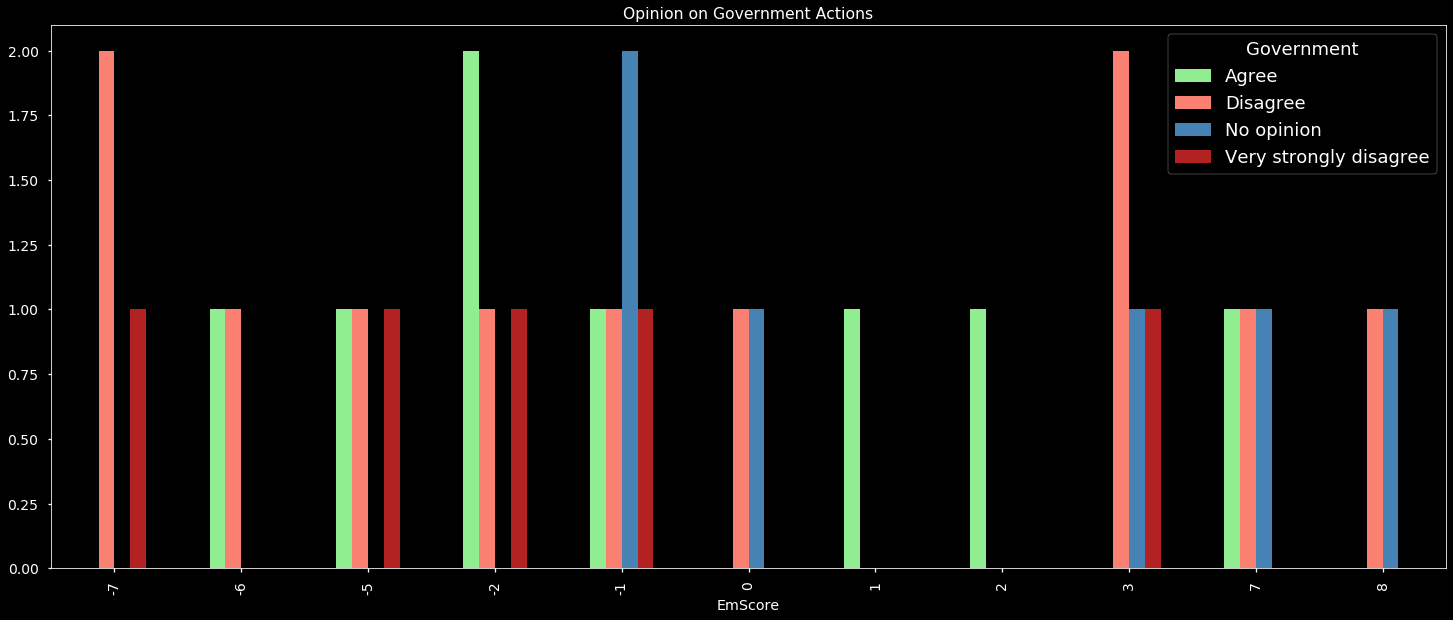

In [120]:
df4.groupby('EmScore').Government.value_counts().unstack().plot(kind='bar', color=['lightgreen', 'salmon', 'steelblue', 'firebrick'], figsize=(25,10), fontsize=14, title=("Opinion on Government Actions"))


In [131]:
df4['Future'].value_counts()

No        14
Unsure     8
Yes        8
Name: Future, dtype: int64

In [132]:
df_future=df4['Future'].value_counts()

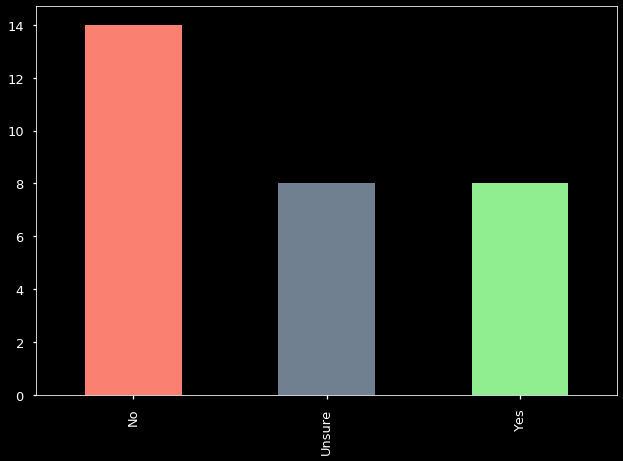

In [137]:
df_future.plot(kind='bar', color=['salmon', 'slategrey', 'lightgreen'])

In [149]:
abc = (100 * df4['Industry'].value_counts(normalize=True))

In [152]:
df4.head()

,Age,Country,Employment,Furlough,Impact,Industry,Flexibility,PPE,Emotions,WFH,Future,Government,Anxiety by Age,Anxiety,EmScore
0,30 - 35,England,Employed full-time,NaN,Unsure,Finance,Both,Yes,"Rested,Productive,Positive","Yes, part of the time",Yes,Disagree,NoAnx,NoAnx,8
1,30 - 35,England,Employed full-time,Yes,Unsure,Finance,Flexibly,Yes,"Peaceful,Rested,Productive","Yes, all of the time",No,Disagree,NoAnx,NoAnx,7
2,30 - 35,England,Full-time student,No,Somewhat positively,IT,Both,Not Applicable,"Anxious,Productive,Depressed","Yes, all of the time",Unsure,Agree,Anx,Anx,-2
3,22 - 25,Scotland,"Employed part-time,Full-time student",No,Somewhat negatively,Finance,Working from home,Yes,"Anxious,Productive,Confused","Yes, part of the time",No,Agree,Anx,Anx,-1
4,30 - 35,England,Employed full-time,No,Somewhat negatively,IT,Working from home,Yes,"Anxious,Productive,Depressed","Yes, part of the time",No,Very strongly disagree,Anx,Anx,-2
